In [90]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
np.concatenate([np.linspace(0.00001,0.001, 5, endpoint=False),np.geomspace(0.001,1, num = 40)]).round(5).tolist()

[1e-05,
 0.00021,
 0.00041,
 0.0006,
 0.0008,
 0.001,
 0.00119,
 0.00143,
 0.0017,
 0.00203,
 0.00242,
 0.00289,
 0.00346,
 0.00412,
 0.00492,
 0.00588,
 0.00702,
 0.00838,
 0.01,
 0.01194,
 0.01425,
 0.01701,
 0.02031,
 0.02424,
 0.02894,
 0.03455,
 0.04125,
 0.04924,
 0.05878,
 0.07017,
 0.08377,
 0.1,
 0.11938,
 0.14251,
 0.17013,
 0.20309,
 0.24245,
 0.28943,
 0.34551,
 0.41246,
 0.49239,
 0.5878,
 0.7017,
 0.83768,
 1.0]

In [92]:
experiments = ["Burgers", "KS"]
models = ["deterministic", "normal", "mixednormal", "mvnormal", "sample"]
index = ["RMSETest","EnergyScoreTest", "t_training_avg", "distributional_method", "seed"]
metrics = ["RMSETest", "EnergyScoreTest", "t_training_avg"]

In [93]:
full_results = pd.DataFrame(columns = ["RMSETest", "EnergyScoreTest", "t_training_avg", "method", "experiment"])
for experiment in experiments:
    det_path = f"../results/{experiment}/deterministic/"
    file_list = ([f for f in glob.iglob(det_path + "**", recursive = True) if os.path.isfile(f) and f.endswith(".csv")])
    results = pd.DataFrame()
    for file in file_list:
        if os.path.exists(file):
            results_df = pd.read_csv(file, index_col=0)
            results = pd.concat([results, results_df], axis = 1)

    for model in models:
        if model != "deterministic":
            path = f"../results/{experiment}/{model}/"
            file_list = ([f for f in glob.iglob(path + "**", recursive = True) if os.path.isfile(f) and f.endswith(".csv")])
            for file in file_list:
                if os.path.exists(file):
                    results_df = pd.read_csv(file, index_col=0)
                    results = pd.concat([results, results_df], axis = 1)

    results = results.loc[index].transpose()
    base_results = results[results["distributional_method"] == "deterministic"][metrics].astype("float")
    for model in models:
        if model != "deterministic":
            model_results = results[results["distributional_method"] == model][metrics].astype("float")
            model_improvement = (base_results-model_results)/base_results
            model_improvement["method"] = model
            model_improvement["experiment"] = experiment
            full_results = pd.concat([full_results, model_improvement], axis = 0)

full_results.rename({"RMSETest": "RMSE", "EnergyScoreTest": "EnergyScore", "t_training_avg":"t"}, axis = 1, inplace = True)
full_results["t"] = full_results["t"]*(-1)

/tmp/ipykernel_1755249/1576092330.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_results = pd.concat([full_results, model_improvement], axis = 0)


# Plot

In [94]:
full_results = full_results.groupby(["experiment", "method"]).mean().reset_index()

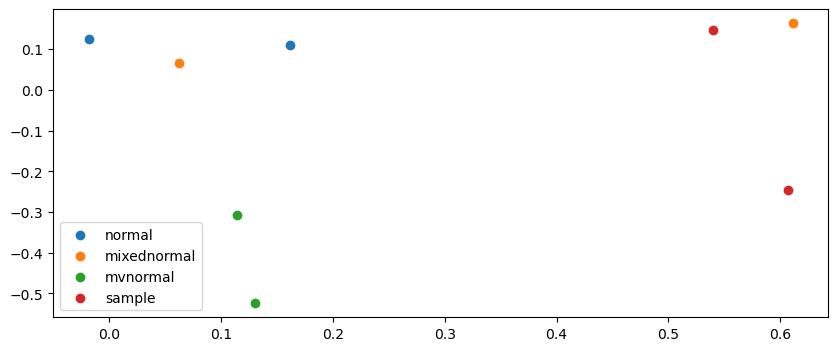

In [98]:
methods = ["normal", "mixednormal", "mvnormal", "sample"]
metric = "EnergyScore"
fig, axs = plt.subplots(1,1,figsize = (10,4))
for method in methods:
    subset = full_results[full_results["method"] == method]
    axs.scatter(subset["t"], subset[metric], label = method)
plt.legend()

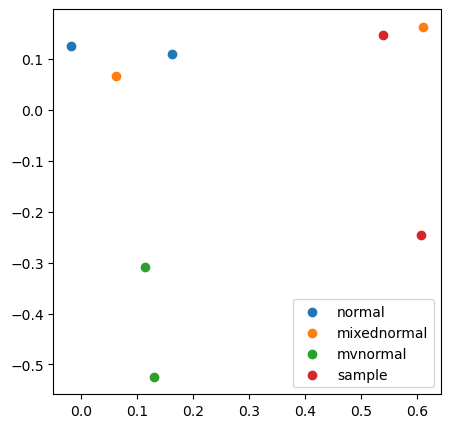

In [97]:
methods = ["normal", "mixednormal", "mvnormal", "sample"]
metric = "EnergyScore"
fig, axs = plt.subplots(1,1,figsize = (5,5))
for method in methods:
    subset = full_results[full_results["method"] == method]
    axs.scatter(subset["t"], subset[metric], label = method)
plt.legend()